3


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:51<00:00,  2.41it/s]


4


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:54<00:00,  2.37it/s]


5


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:46<00:00,  2.48it/s]


6


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:48<00:00,  2.45it/s]


7


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:48<00:00,  2.45it/s]


8


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:48<00:00,  2.45it/s]


9


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:47<00:00,  2.46it/s]


10


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:48<00:00,  2.45it/s]


11


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:48<00:00,  2.45it/s]


12


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:54<00:00,  2.36it/s]


13


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:45<00:00,  2.50it/s]


14


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:48<00:00,  2.45it/s]


15


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:48<00:00,  2.46it/s]


16


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:55<00:00,  2.35it/s]


17


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:48<00:00,  2.44it/s]


18


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:51<00:00,  2.41it/s]


19


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:57<00:00,  2.33it/s]


20


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:53<00:00,  2.38it/s]


21


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:47<00:00,  2.47it/s]


22


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:45<00:00,  2.50it/s]


23


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:43<00:00,  2.52it/s]


24


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:43<00:00,  2.52it/s]


25


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:44<00:00,  2.52it/s]


26


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:42<00:00,  2.53it/s]


27


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:39<00:00,  2.58it/s]


28


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:43<00:00,  2.52it/s]


29


100%|████████████████████████████████████████████████████████████████████████████████| 413/413 [02:38<00:00,  2.60it/s]


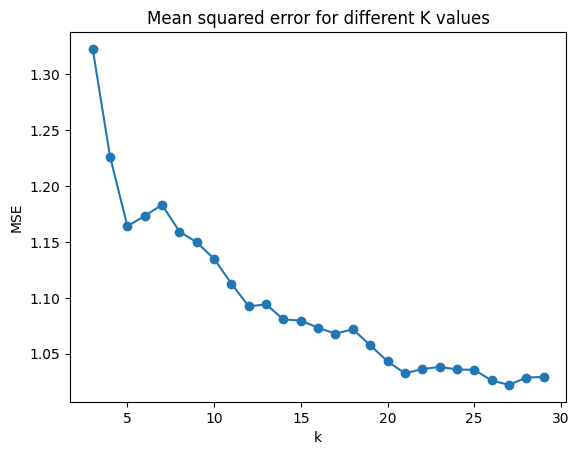

In [1]:
# Importing the relevant libraries
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fetching the house price from the module and assigning to a dataframe
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Setting the X and y for training
X = df[['AveRooms', 'HouseAge']]
y = housing.target

# Splitting the data into train and test and setting the random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=110)

# Point_1 is our point, and point_2 is the training point (these points will be in Cartesian coordinates)
def minowski_distance(point_1, point_2, p):
    return np.power(np.sum(np.abs(point_1 - point_2)**p), 1/p)

def predict_price_minowski(X_train, y_train, sample, k, p):
    distances_minowski = []
    for x in X_train.to_numpy():
        distance_minowski = minowski_distance(sample, x, p)
        distances_minowski.append(distance_minowski)
    sorted_distances_minowski = np.argsort(distances_minowski)
    k_nearest_targets_minowski = y_train[sorted_distances_minowski[:k]]
    predict_price_minowski = np.mean(k_nearest_targets_minowski)
    return predict_price_minowski

def calculate_mse_for_k(X_train, y_train, X_test, y_test, k, p):
    predited_price_list_minowski_new = []
    for sample in tqdm(X_test.to_numpy()):
        price = predict_price_minowski(X_train, y_train, sample, k, p)
        predited_price_list_minowski_new.append(price)
    mse = mean_squared_error(y_test, predited_price_list_minowski_new)
    return mse

k_values = range(3, 30)
mse_values = []
for k in k_values:
    print(k)
    mse = calculate_mse_for_k(X_train, y_train, X_test, y_test, k, p=3)  # Added p=3
    mse_values.append(mse)

import matplotlib.pyplot as plt
plt.plot(k_values, mse_values, marker='o')  # Changed scatterplot to plot
plt.title("Mean squared error for different K values")
plt.xlabel("k")
plt.ylabel("MSE")
plt.show()
